In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df=pd.read_csv("C:/Users/Silvia/workspace/data/diabetes.csv")
print(df.head)

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [23]:
X=df.drop('Outcome',axis=1).values
Y=df['Outcome'].values
print(Y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [24]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42,stratify=Y)


In [28]:
from sklearn.neighbors import KNeighborsClassifier

neighbors=np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    train_accuracy[i]=knn.score(X_train,Y_train)
    test_accuracy[i]=knn.score(x_test,y_test)
    

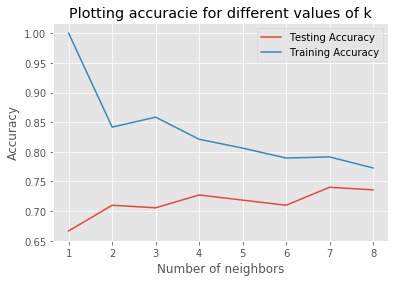

In [30]:
plt.title('Plotting accuracie for different values of k')
plt.plot(neighbors,test_accuracy,label='Testing Accuracy')
plt.plot(neighbors,train_accuracy,label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()


In [29]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
knn.score(x_test,y_test)


0.7402597402597403

In [31]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[129,  21],
       [ 39,  42]], dtype=int64)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.77      0.86      0.81       150
           1       0.67      0.52      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



In [38]:
print(df.iloc[:,-1])
y_pred_probability=knn.predict_proba(x_test)[:,1]
print(y_pred_probability)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64
[0.         0.14285714 0.71428571 0.57142857 0.42857143 0.14285714
 0.57142857 0.14285714 0.14285714 0.14285714 0.         0.42857143
 0.14285714 0.57142857 0.71428571 0.85714286 0.71428571 0.42857143
 0.71428571 0.         0.28571429 0.71428571 0.14285714 0.
 0.71428571 0.14285714 0.28571429 0.28571429 0.14285714 0.14285714
 0.85714286 0.42857143 0.28571429 0.28571429 0.71428571 0.71428571
 0.28571429 0.42857143 0.28571429 0.57142857 0.         0.85714286
 0.28571429 0.         0.         0.57142857 0.28571429 0.85714286
 0.14285714 0.         0.28571429 0.         0.28571429 0.
 0.28571429 0.14285714 0.         0.85714286 0.28571429 0.28571429
 0.         0.28571429 0.71428571 0.28571429 0.         0.
 0.28571429 0.28571429 0.14285714 0.28571429 1.         0.28571429
 0.14285714 0.14285714 0.14285714 0.14285714 0.42857143 0.14285714
 0.         0

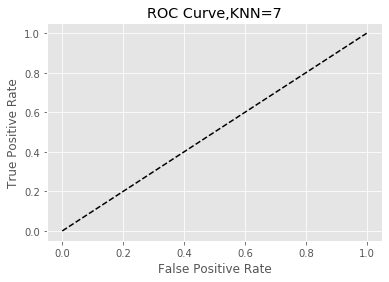

In [43]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred_probability)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve,KNN=7')
plt.show()

In [44]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_probability)

0.7490123456790124

In [45]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [46]:
knn_cv.best_score_
knn_cv.best_params_

{'n_neighbors': 14}

In [50]:
bins=np.linspace(10,20,4)
print(bins)

[10.         13.33333333 16.66666667 20.        ]
